<a href="https://colab.research.google.com/github/Kirtiwardhan01/Neural-Style-/blob/master/Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets,transforms

from torch import nn
import torch.nn.functional as f
from torch import optim

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))])    #There was an error here #Solved it
#The error is due to color vs grayscale on the dataset, the dataset is grayscale.I fixed it by changing transform to
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [0]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      #nn.Linear(128, 64),
                      #nn.ReLU(),
                      nn.Linear(256, 10),
                      nn.LogSoftmax(dim=1),
                     nn.Dropout(p=0.2))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
epoch = 10
train_losses, test_losses = [], []
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        # Take an update step and few the new weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
        #print(f"Training loss: {running_loss/len(trainloader)}")
        model.train()

Epoch: 1/10..  Training Loss: 1.608..  Test Loss: 1.164..  Test Accuracy: 0.699
Epoch: 2/10..  Training Loss: 0.985..  Test Loss: 0.875..  Test Accuracy: 0.730
Epoch: 3/10..  Training Loss: 0.797..  Test Loss: 0.765..  Test Accuracy: 0.745
Epoch: 4/10..  Training Loss: 0.721..  Test Loss: 0.708..  Test Accuracy: 0.754
Epoch: 5/10..  Training Loss: 0.671..  Test Loss: 0.670..  Test Accuracy: 0.764
Epoch: 6/10..  Training Loss: 0.638..  Test Loss: 0.642..  Test Accuracy: 0.773
Epoch: 7/10..  Training Loss: 0.613..  Test Loss: 0.622..  Test Accuracy: 0.781
Epoch: 8/10..  Training Loss: 0.591..  Test Loss: 0.605..  Test Accuracy: 0.784
Epoch: 9/10..  Training Loss: 0.577..  Test Loss: 0.591..  Test Accuracy: 0.789
Epoch: 10/10..  Training Loss: 0.560..  Test Loss: 0.577..  Test Accuracy: 0.794


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [0]:
def test_network(net,trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters, lr=0.001)

    dataiter = iter(trainloader)
    images,labels = dataiter.next()

    #creating variables for inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    #Clearing the gradients from all variables
    optimizer.zero_grad()

    #Forward Pass then Backward pass and then updating the weights
    output = net.forward(inputs)
    loss = criterion(output,targets)
    loss.backward()
    optimizer.step()

    return True



In [0]:
def imshow(image, ax=None, title=None, normalize=True):
  """imshow for Tensor"""
  if ax is None:
    fig,ax = plt.subplots()
  image = image.numpy().transpose((1,2,0))

  if normalize:
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229,0.224,0.225])
    image = std*image + mean
    image = np.clip(image,0,1)

    ax.imshow(image)
    ax.spines['top']/set_visible(False)
    ax.spines['left']/set_visible(False)
    ax.spines['right']/set_visible(False)
    ax.spines['bottom']/set_visible(False)
    ax.tick_params(axis='both',length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    
    return ax

In [0]:
def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

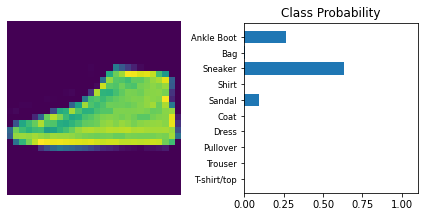

In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
view_classify(img.view(1, 28, 28), ps, version='Fashion')




